<a href="https://colab.research.google.com/github/francosergioingE/tarea_01_Sergio_franco/blob/main/tareasemana3y4introaForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ORO!!! Forecasting

sergio steven franco arboleda

In [ ]:
## Importando las librerías
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [ ]:
dataframeGold = pd.read_csv('gold_price_data.csv')
print(dataframeGold.columns)
dataframeGold.describe()

Index(['Date', 'Value'], dtype='object')


,Value
count,10787.000000
mean,653.596634
std,434.030848
min,35.100000
25%,349.200000
50%,409.350000
75%,1061.625000
max,1895.000000


In [ ]:
print(dataframeGold.dtypes)
dataframeGold.head(15)

Date      object
Value    float64
dtype: object


,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4
5,1971-04-01,38.9
6,1971-07-01,40.1
7,1971-10-01,42.0
8,1972-01-03,43.5
9,1972-04-03,48.3


In [ ]:
etiqueta = np.array(dataframeGold['Value'])[2:]
car_m1 = np.array(dataframeGold['Value'])[1:-1]
car_m2 = np.array(dataframeGold['Value'])[:-2]
print(len(etiqueta))
print(len(car_m1))
print(len(car_m2))

10785
10785
10785


In [ ]:
## Agrupando los datos en un único Dataframe y exportándolo a un archivo CSV
dataset = pd.DataFrame({'Carac menos 2':car_m2, 'Carac menos 1':car_m1, 'Etiqueta':etiqueta})
dataset.to_csv('goldPriceArranged.csv')

In [ ]:
## Pasando los datos a una matriz de tipo numpy
matrizDatos = dataset.to_numpy()
print(matrizDatos.shape)

(10785, 3)


In [ ]:
def funcCosto(arr_1, arr_2):
  J = np.power(arr_1-arr_2,2)
  return np.sum(J)/(2*len(J))

In [ ]:
## Pasos GridSearch
#  h(x) = T0*x0 + T1*x1

# 1. Valores a T0 a T1
dict_resultados = dict()

for T0 in np.arange(-10,10,1/10):
  for T1 in np.arange(-10,10,1/10):

#   2. Encuentras h(x)
    h_x = T0*car_m1 + T1*car_m2

#   3. Evalúar la función de costo
    dict_resultados[(T0,T1)]=funcCosto(h_x,etiqueta)
    
# 4. Encontrar el menor
parameters = list(dict_resultados.keys())
#print(parameters)
costValues = np.array(list(dict_resultados.values()))
#print(costValues)
indexMinCost = costValues.argmin()
print(indexMinCost)
bestParameters = parameters[indexMinCost]
print("Los mejores parámetros son:",bestParameters,"donde la función de costo retornó: ",costValues[indexMinCost])
print("el resultado con mejor estimacion fue 40.8, en general, no baja del valor")

22100
Los mejores parámetros son: (0.9999999999999609, -3.552713678800501e-14) donde la función de costo retornó:  40.808982642564544
el resultado con mejor estimacion fue 40.8, en general, no baja del valor


Los mejores parámetros son: (0.9999999999999996, -2.220446049250313e-16) donde la función de costo retornó:  40.80898264255915


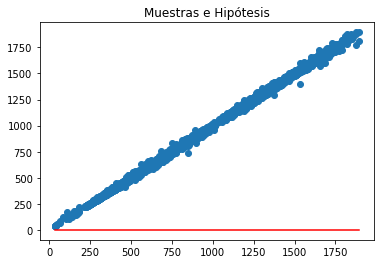

el resultado tiene una estimacion mala, por lo cual no se obtiene una grafica coherente y correcta


In [ ]:
print("Los mejores parámetros son:",bestParameters,"donde la función de costo retornó: ",costValues[indexMinCost])
plt.scatter(car_m1,etiqueta)
x = np.arange(car_m1.min(),car_m1.max(),(car_m1.max()-car_m1.min())/1000)
plt.plot(x,bestParameters[0]+bestParameters[1]*x,'r-')
plt.title("Muestras e Hipótesis")
plt.show()
print("el resultado tiene una estimacion mala, por lo cual no se obtiene una grafica coherente y correcta")